# Checkpoint 05
---
#### Ana Luísa Bernardi Elias - RM: 93686
#### Julio Cesar Lopes Batista - RM: 94543


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

In [18]:
#separa e trata imagens de teste
(imagem_treino, classe_treino), (imagem_teste, classe_teste) = tf.keras.datasets.cifar100.load_data()

imagem_treino = imagem_treino/255
imagem_teste = imagem_teste/255

#criar modelo
filtros = 64
k = 3
dense = 128
classes = 100

model = models.Sequential([
    layers.Conv2D(filtros, (k, k), activation='relu', input_shape=(32,32,3), padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    layers.Conv2D(filtros, (k, k), activation='relu', padding='same'),

    layers.MaxPooling2D((2,2), strides=2),

    layers.Flatten(),

    layers.Dense(dense, activation='relu'),
    layers.Dense(classes, activation='softmax')

])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576,036 (2.20 MB)

 Trainable params: 576,036 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#treina modelo


epocas = model.fit(imagem_treino, classe_treino, epochs = 25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0881 - loss: 4.0505
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2648 - loss: 2.9869
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3399 - loss: 2.5993
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3994 - loss: 2.3366
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4391 - loss: 2.1584
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4758 - loss: 1.9820
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5040 - loss: 1.8497
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5313 - loss: 1.7402
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5574 - loss: 1.6212
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5759 - loss: 1.5349
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6012 - loss: 1.4361
Epoch 12/25
1563/1563 ━━━━━━━

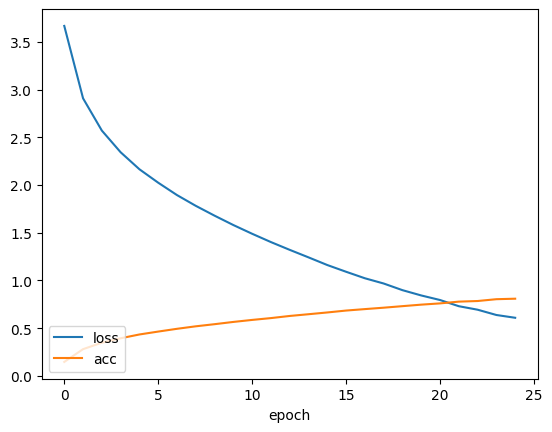

In [28]:
history_df = pd.DataFrame(epocas.history)

plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(imagem_teste,classe_teste)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3302 - loss: 5.0922
5.009833335876465
0.33480000495910645


In [30]:
predictions = model.predict(imagem_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,
                                       color = color))

def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i].item()
   plt.grid(False)
   plt.xticks(range(100),range(100))
   plt.yticks([])
   thisplot = plt.bar(range(100), predictions_array, color = "#77777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

In [37]:
predictions = model.predict(imagem_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
for i in range(250):
  if(np.argmax(predictions[i]) != classe_teste[i]):
    print(i)

0
1
2
3
5
6
7
9
10
11
15
16
19
21
22
23
26
28
29
31
33
35
36
37
38
40
41
42
43
46
47
48
49
51
52
53
55
58
59
60
62
63
64
65
66
67
68
69
70
71
72
73
74
75
77
78
79
81
83
84
86
87
88
90
92
95
96
97
98
99
100
101
102
103
104
108
112
113
115
118
121
122
123
124
125
127
128
129
130
132
133
134
137
140
143
144
146
148
149
150
151
152
153
155
156
157
158
159
160
162
164
167
170
171
172
173
174
175
176
178
180
181
183
184
186
187
188
189
190
191
192
196
197
198
200
206
208
209
211
212
213
214
215
216
217
218
220
221
222
223
224
225
227
228
229
230
234
235
236
237
240
242
243
244
245
246
247


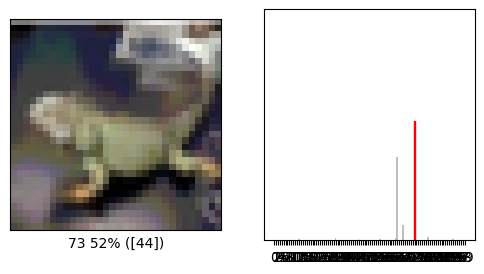

In [42]:
i = 247
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, classe_teste, imagem_teste[:,:,:])
plt.subplot(1,2,2)
plot_value_array(i, predictions, classe_teste)